In [69]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

In [70]:
np.random.seed(42)
data = {
    'CustomerID': np.arange(1, 201),
    'Age': np.random.randint(18, 70, size=200),
    'Average_Spending': np.random.randint(100, 10000, size=200),
    'Visits_Per_Week': np.random.randint(1, 30, size=200),
    'Promotion_Interest': np.random.randint(1, 11, size=200)
}
df = pd.DataFrame(data)
df.head()

,CustomerID,Age,Average_Spending,Visits_Per_Week,Promotion_Interest
0,1,56,9001,15,7
1,2,69,5675,28,5
2,3,46,5630,2,1
3,4,32,4513,2,7
4,5,60,3848,23,7


Data Summary:        CustomerID        Age  Average_Spending  Visits_Per_Week  \
count  200.000000  200.00000        200.000000       200.000000   
mean   100.500000   43.42500       4895.130000        15.510000   
std     57.879185   14.94191       2758.896933         8.872627   
min      1.000000   18.00000        198.000000         1.000000   
25%     50.750000   31.00000       2457.750000         7.000000   
50%    100.500000   43.50000       4836.500000        16.000000   
75%    150.250000   56.00000       7233.250000        23.000000   
max    200.000000   69.00000       9988.000000        29.000000   

       Promotion_Interest  
count          200.000000  
mean             5.440000  
std              2.927327  
min              1.000000  
25%              3.000000  
50%              5.000000  
75%              8.000000  
max             10.000000  

Missing Values:
 CustomerID            0
Age                   0
Average_Spending      0
Visits_Per_Week       0
Promotion_Intere

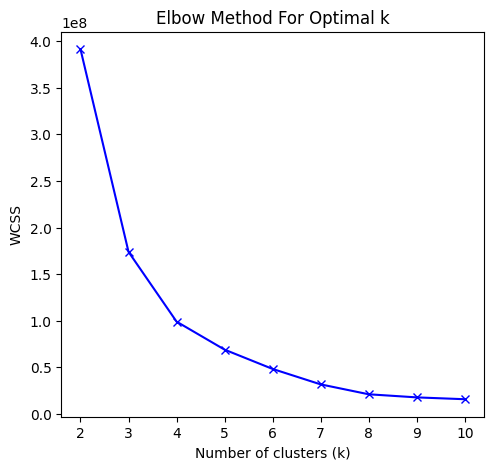

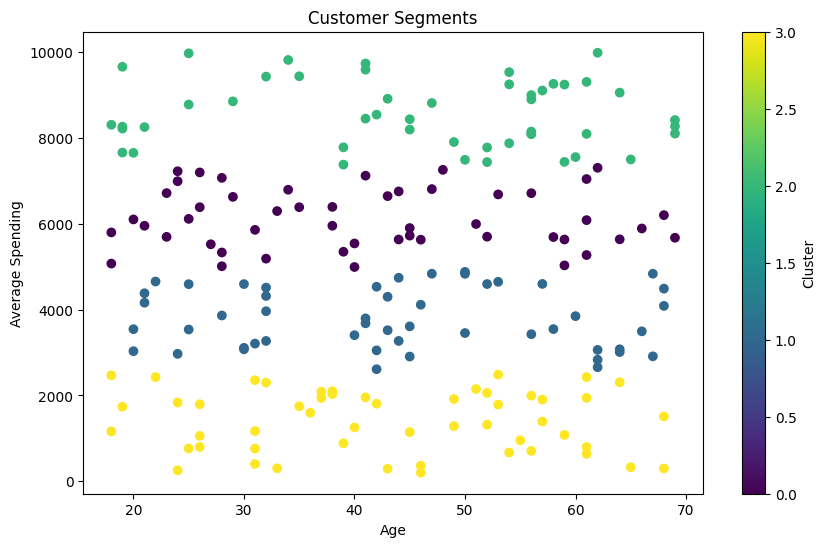

In [71]:
print("Data Summary:"
      , df.describe())
print("\nMissing Values:\n", df.isnull().sum())
features = df[['Age', 'Average_Spending', 'Visits_Per_Week', 'Promotion_Interest']]
wcss = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    # silhouette_avg = silhouette_score(features, kmeans.labels_)
    # silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
# plt.subplot(1, 2, 2)
# plt.plot(K, silhouette_scores, 'bx-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score For Optimal k')
# plt.tight_layout()
# plt.show()
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)
print("\nCluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Counts:\n", df['Cluster'].value_counts())
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Average_Spending'] ,c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Age')
plt.ylabel('Average Spending')
plt.title('Customer Segments')
plt.colorbar(label='Cluster')
plt.show()

In [72]:
test = df['Cluster']==3
print(df[test])
silhouette_score(features, df['Cluster'])

     CustomerID  Age  Average_Spending  Visits_Per_Week  Promotion_Interest  \
5             6   25               763               22                   9   
6             7   38              2098               19                   3   
8             9   36              1595               26                   1   
12           13   41              1953               26                   6   
14           15   57              1391               17                   1   
18           19   19              1736               15                   9   
20           21   61               798               11                   4   
22           23   55               954                5                  10   
29           30   42              1807                5                   4   
34           35   33               302               20                   5   
38           39   61              2427                8                  10   
42           43   68               297              

0.5644867668231095

In [73]:
import pickle
pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))

In [74]:
def customer(age, avg_spending, visits_per_week, promotion_interest):
    new_customer = np.array([[age, avg_spending, visits_per_week, promotion_interest]])
    predicted_cluster = kmeans.predict(new_customer)

    if predicted_cluster == 0:
        return "Cluster 0: Young, low spenders, infrequent visitors, low promotion interest."
    elif predicted_cluster == 1:
        return "Cluster 1: Middle-aged, high spenders, frequent visitors, high promotion interest."
    elif predicted_cluster == 2:
        return "Cluster 2: Older, moderate spenders, moderate visitors, moderate promotion interest."
    elif predicted_cluster == 3:
        return "Cluster 3: Young adults, high spenders, frequent visitors, high promotion interest."
    else:
        return "Unknown cluster."
    pass

In [75]:
age = 41
avg_spending = 5000
visits_per_week = 10
promotion_interest = 7


print(customer(age, avg_spending, visits_per_week, promotion_interest))


Cluster 0: Young, low spenders, infrequent visitors, low promotion interest.


c:\Users\yogesh.gowda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [76]:
age = 36
avg_spending = 1591
visits_per_week = 26
promotion_interest = 1


print(customer(age, avg_spending, visits_per_week, promotion_interest))


Cluster 3: Young adults, high spenders, frequent visitors, high promotion interest.


c:\Users\yogesh.gowda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
